# Analysis of Fitbit Charge 2 HR for Sleep and Activity Monitoring

Jump to [Clockfill](#clockfill)

## Preprocessing

In [1]:
from pathlib import Path
import os
import glob
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
sr = '1T' # 1 minute, downsampling Actiwatch from 30 s to 1 min
recording_period_min = [7, 10]
interpolate_limit = 10 # 10 minute limit

In [10]:
home_dir = str(Path.home())
data_dir = os.path.join(home_dir, 'Box/CogNeuroLab/Wearables/data/')

act_files = glob.glob(data_dir + 'actiwatch/actiware_manual_clean/*.csv')
fit_files = glob.glob(data_dir + 'fitbit/*minuteStepsNarrow*.csv')

In [11]:
act_files

['/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/actiware_manual_clean/10011_10_24_2019_4_30_00_PM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/actiware_manual_clean/10011_11_30_2020_9_00_00_AM_Manual.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/actiware_manual_clean/10012_10_18_2019_3_30_00_PM_Manual.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/actiware_manual_clean/10014_11_11_2019_5_20_00_PM_Manual.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/actiware_manual_clean/10016_1_24_2020_11_45_00_AM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/actiware_manual_clean/10024_11_5_2019_3_15_00_PM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/actiware_manual_clean/10025_12_5_2019_2_15_00_PM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/actiware_manual_clean/10033_11_7_2019_2_50_00_PM_

In [12]:
act = {}

created output directory /Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/actiware_manual_clean/preproc/
successfully read Actiware data file
record 10011
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10011
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10011
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10011
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10012
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10012
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10014
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10014
----- success: 0.00 

/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10040


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10045


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10045


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10045


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10045


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
unable to preprocess subject 10049
[Errno 5] Input/output error
<class 'OSError'> preproc.py 36
successfully read Actiware data file
record 10049


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10062


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10062


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10139


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10139


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10140


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10140


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10143


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10143


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10144


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10144


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10146


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10146


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10147


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10147


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10148


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10148


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
unable to preprocess subject 10149
[Errno 5] Input/output error
<class 'OSError'> preproc.py 36
successfully read Actiware data file
record 10149


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10150


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10150


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10152


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10152


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20076


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20076


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20076


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20076


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20103


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20103


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20105


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20105


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20105


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20105


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20108


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20108


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20113


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20113


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20115


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20115


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20120


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20120


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20122


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20122


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20123


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20123


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20124


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20124


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20125


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20125


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20127


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20127


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20129


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20129


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20131


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20131


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20142


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20142


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20154


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20154


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20155


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20155


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20157


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20157


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20163


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20163


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20168


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20168


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20176


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20176


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20177


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20177


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20178


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20178


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20180


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20180


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20181


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20181


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20182


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20182


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20184


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20184


/usr/local/lib/python3.7/site-packages/wearables/preproc.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axs = plt.subplots(2, 1, sharex=True)


----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
unable to preprocess subject wa_ac
list indices must be integers or slices, not str
<class 'TypeError'> preproc.py 50
unable to preprocess subject wa_ac
list indices must be integers or slices, not str
<class 'TypeError'> preproc.py 50


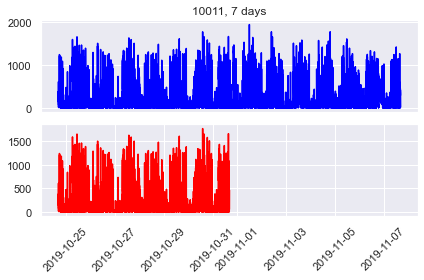

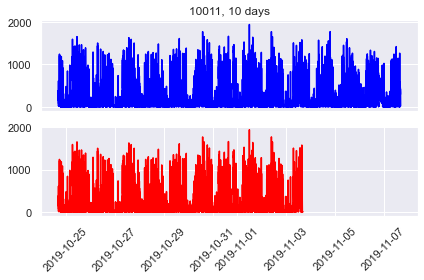

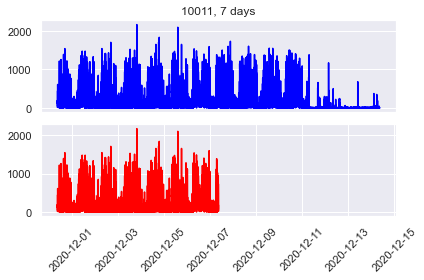

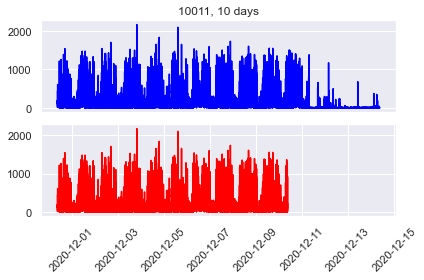

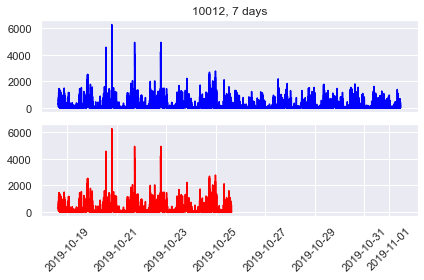

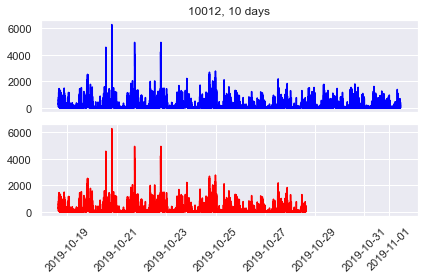

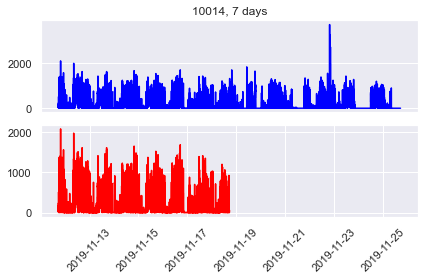

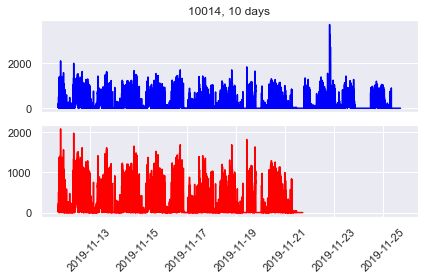

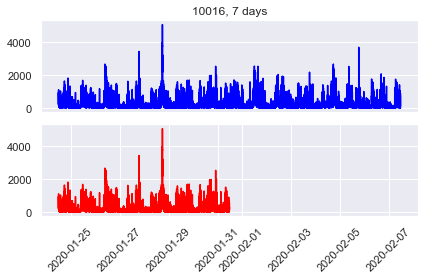

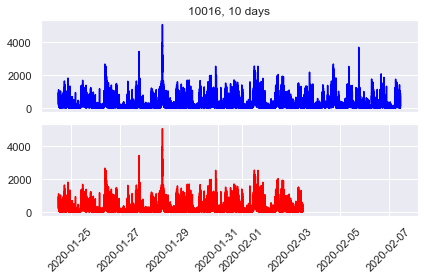

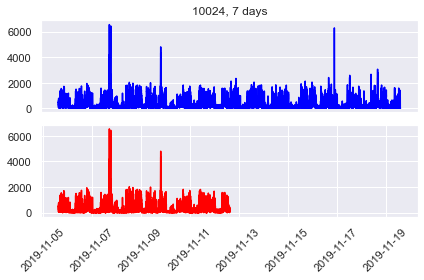

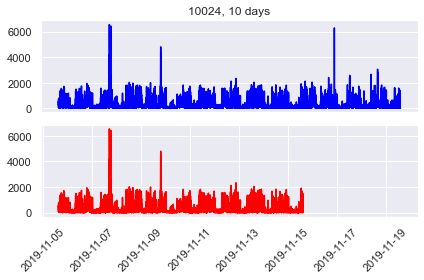

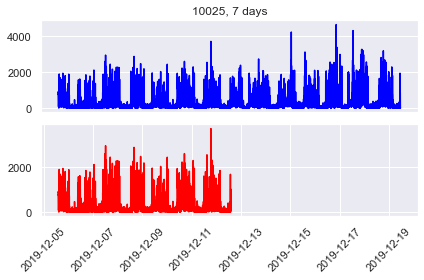

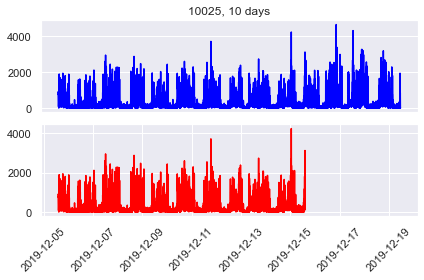

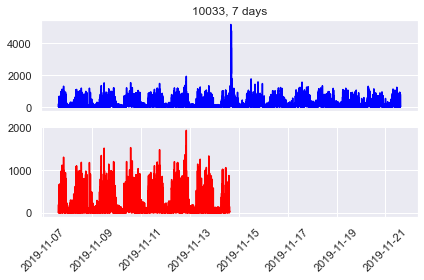

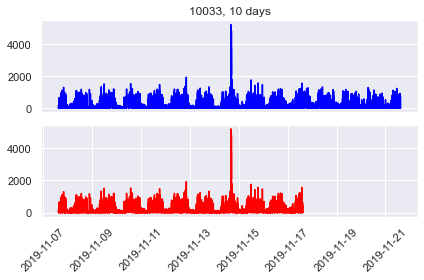

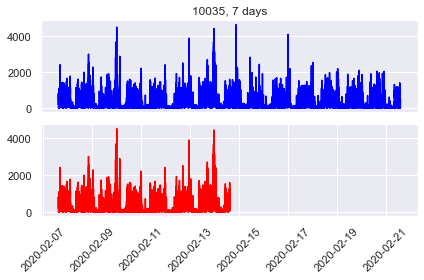

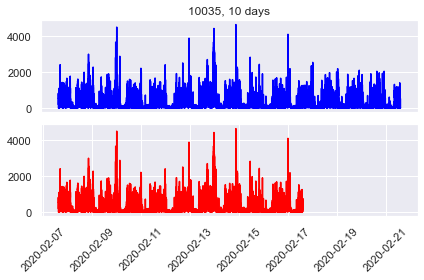

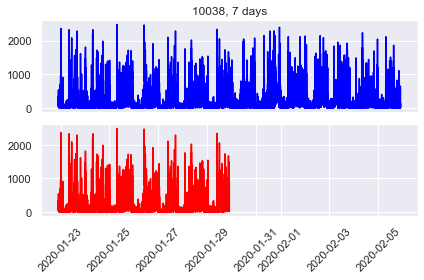

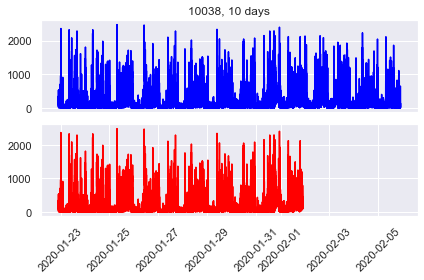

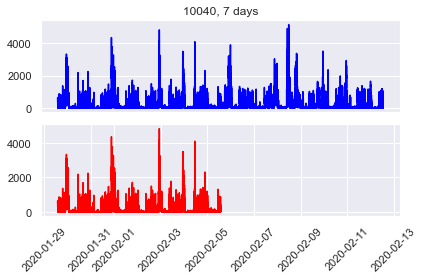

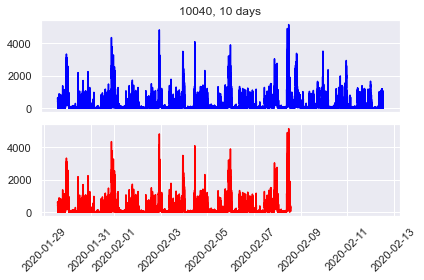

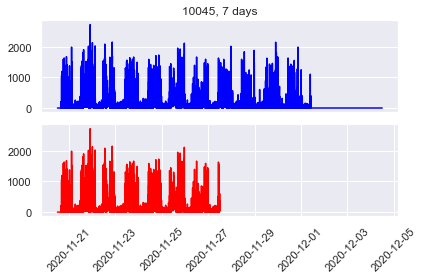

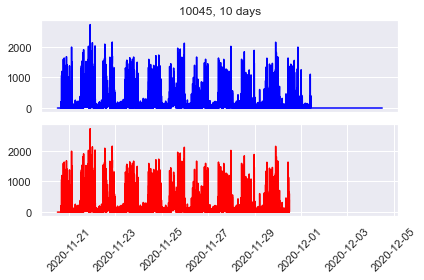

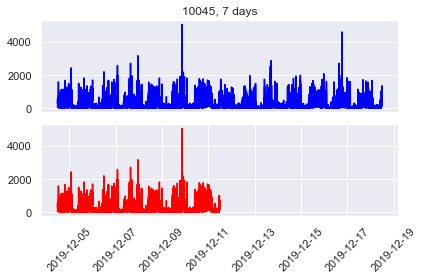

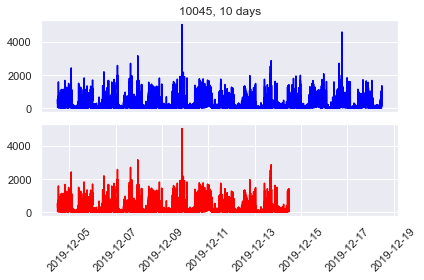

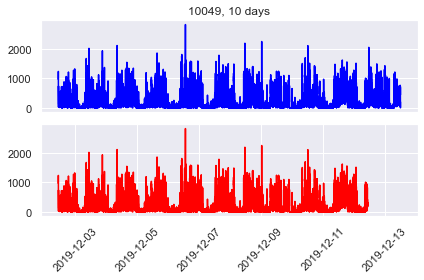

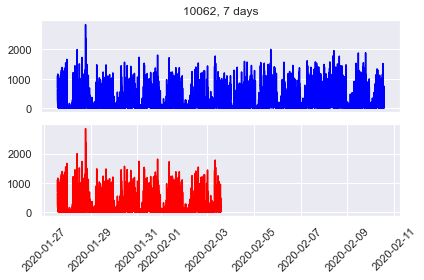

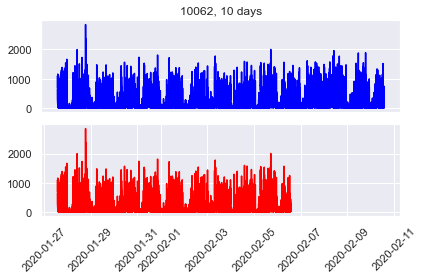

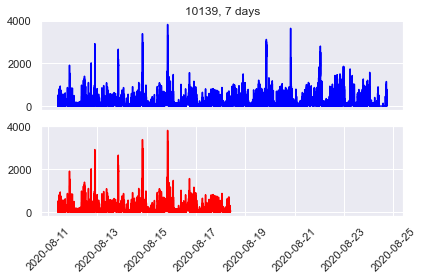

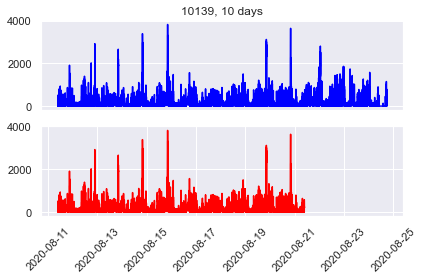

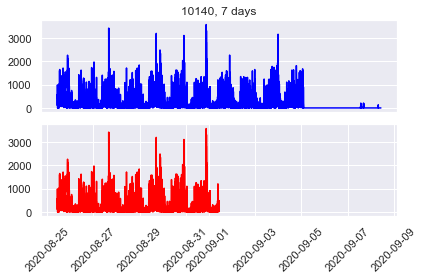

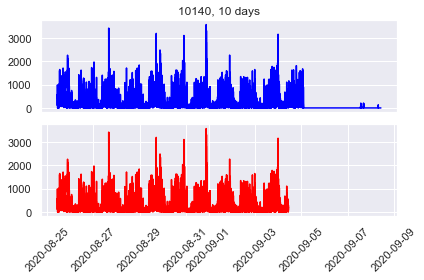

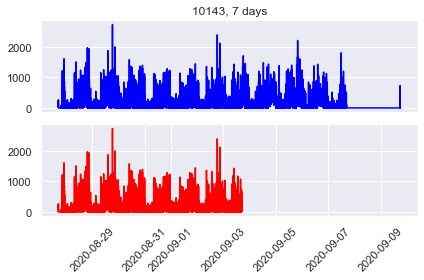

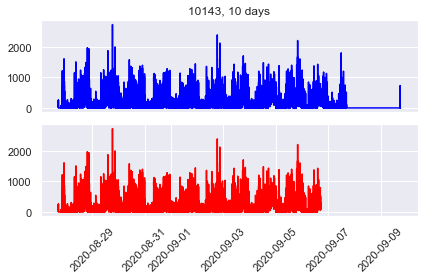

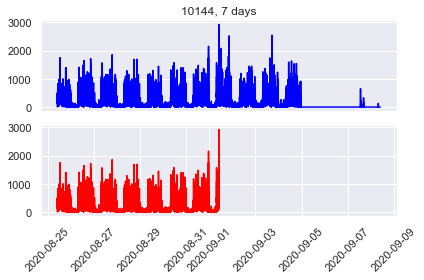

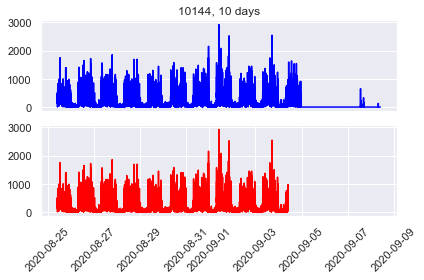

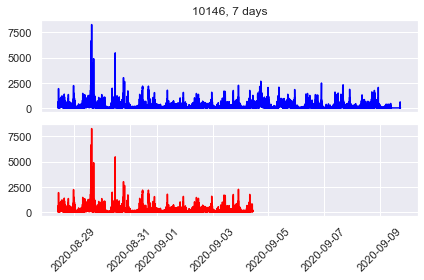

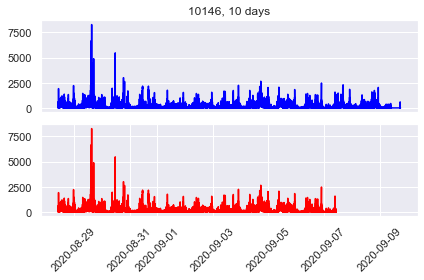

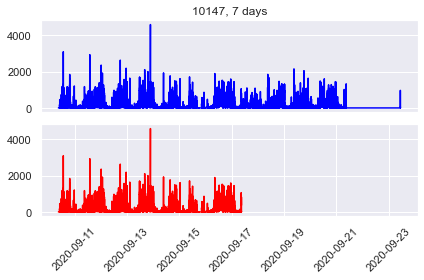

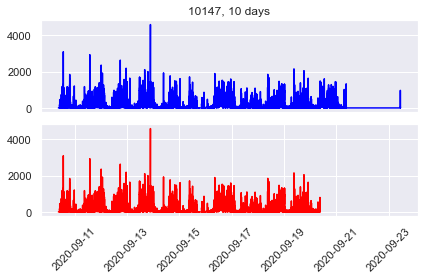

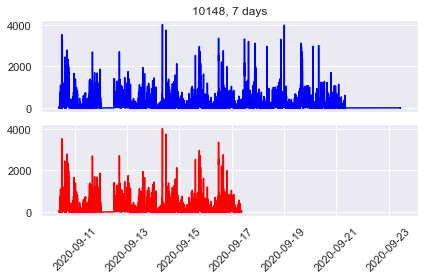

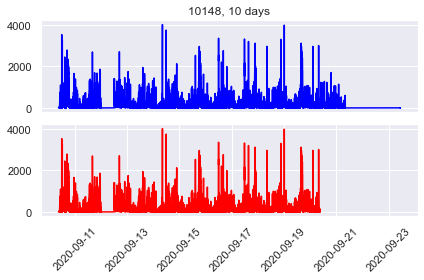

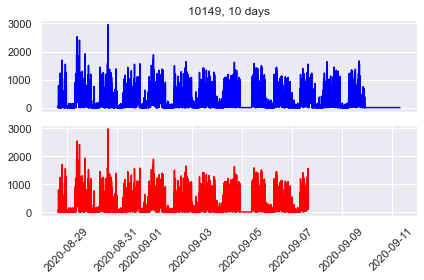

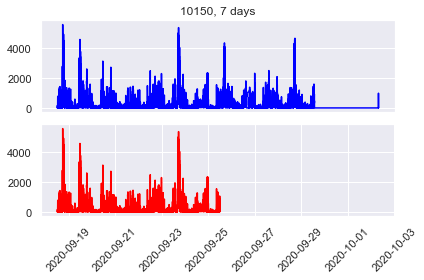

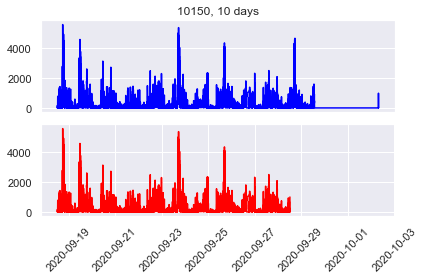

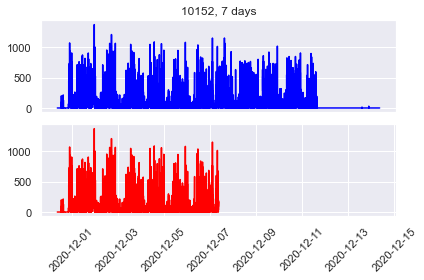

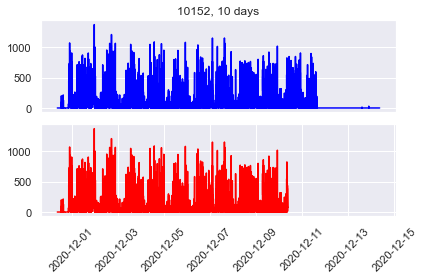

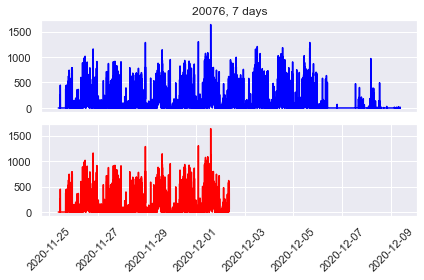

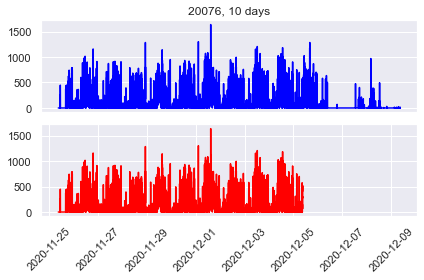

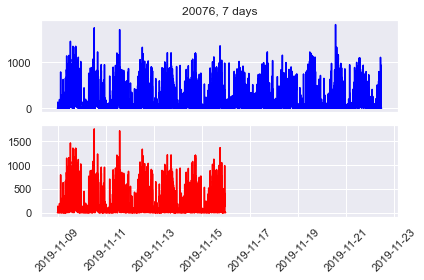

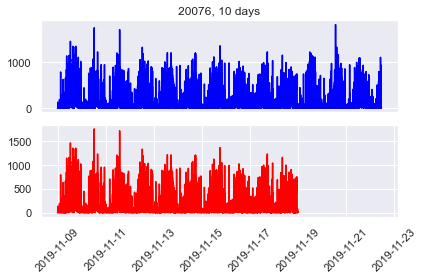

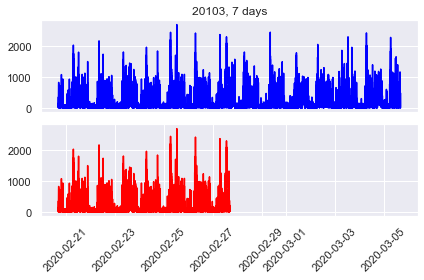

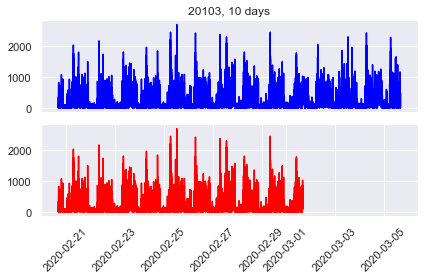

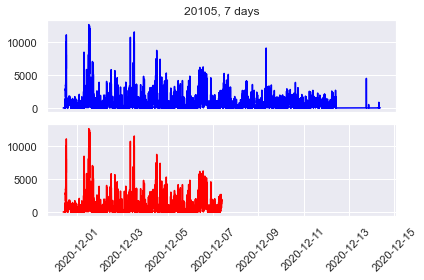

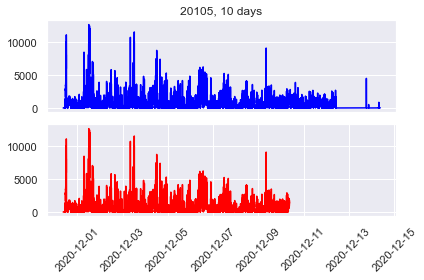

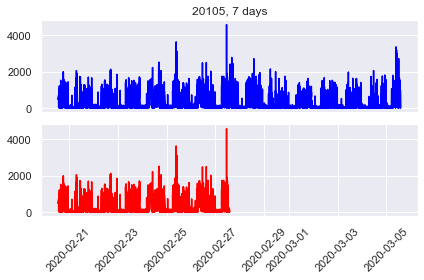

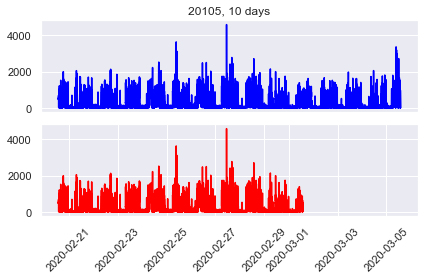

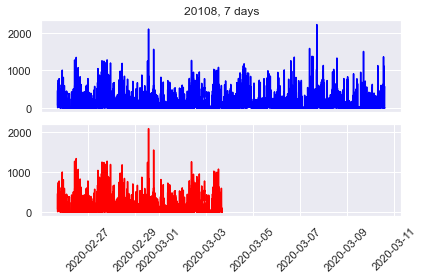

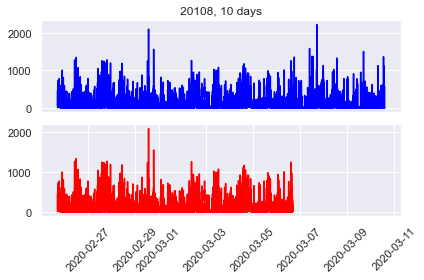

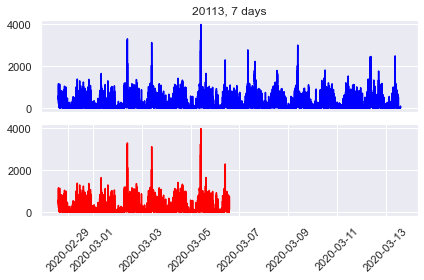

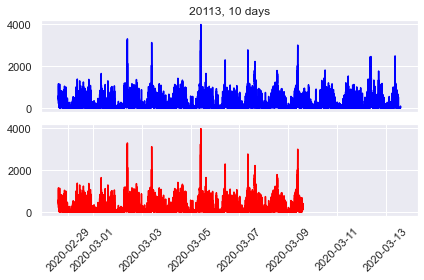

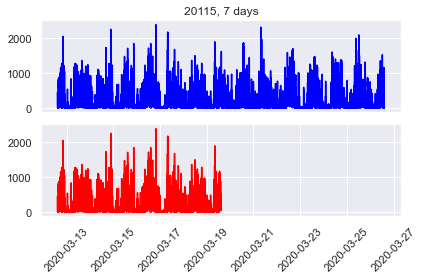

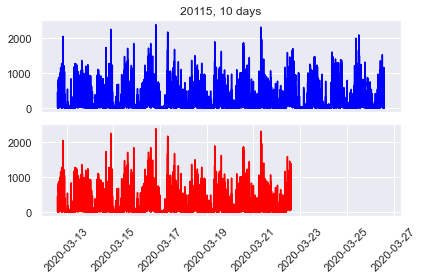

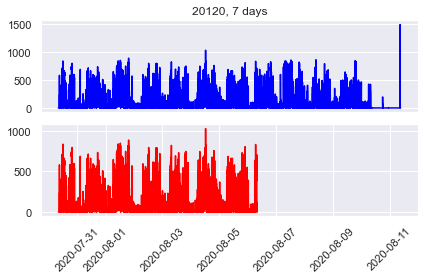

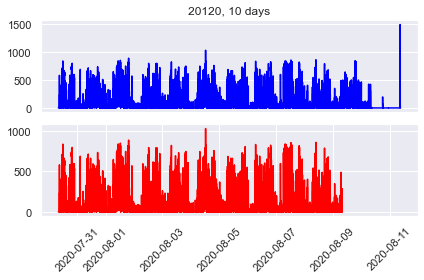

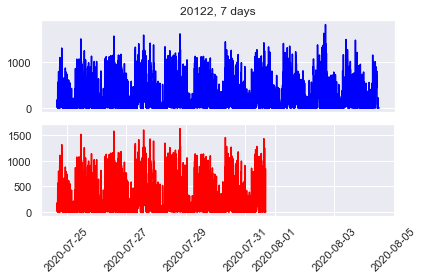

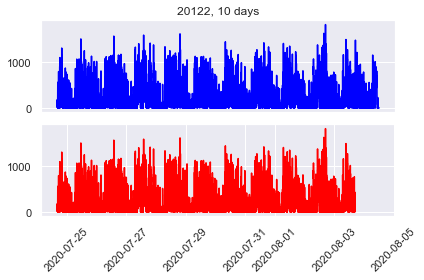

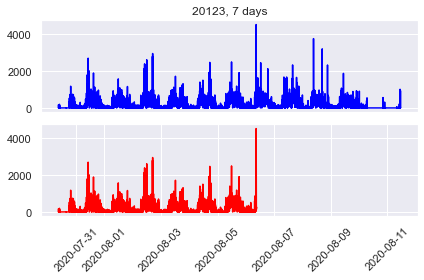

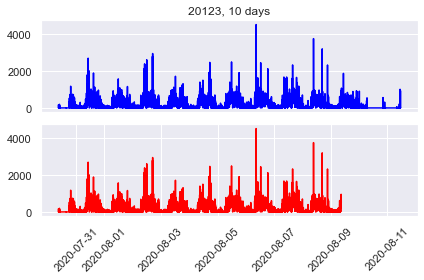

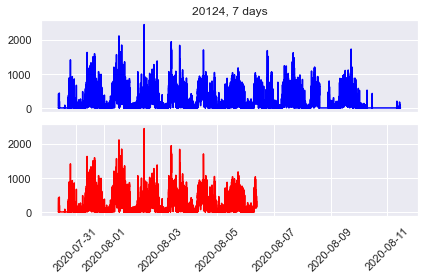

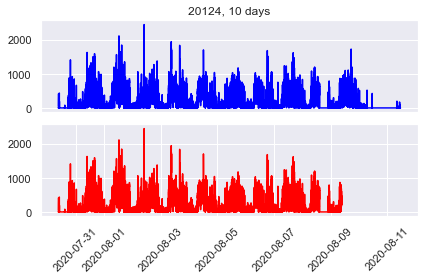

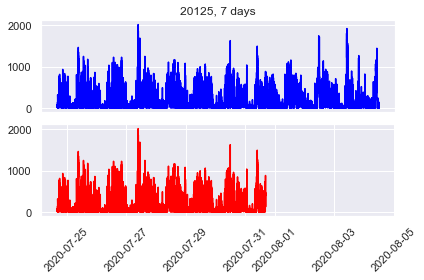

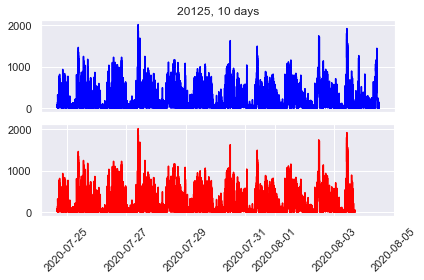

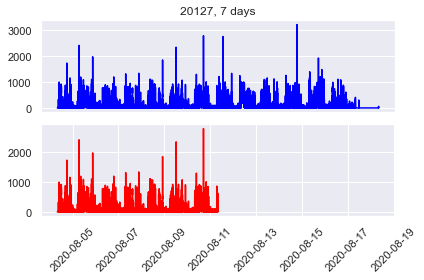

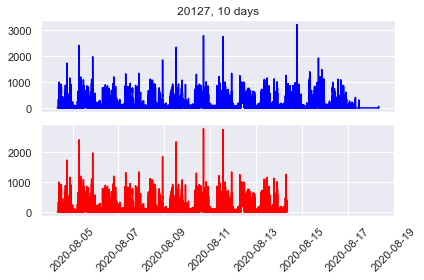

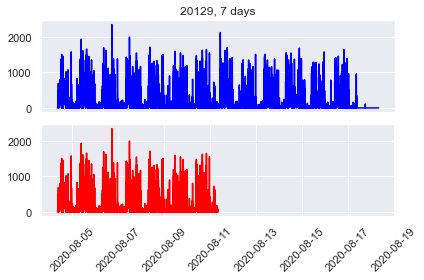

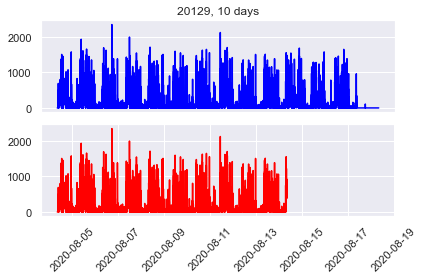

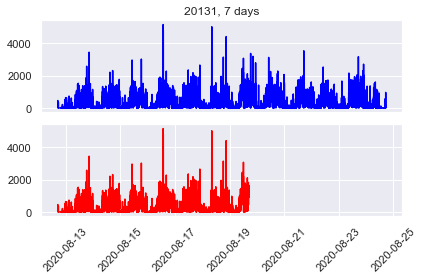

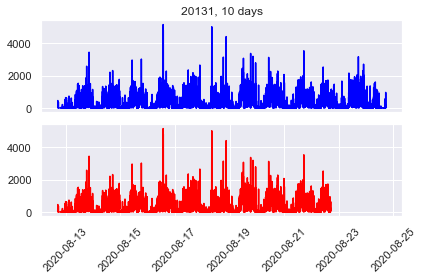

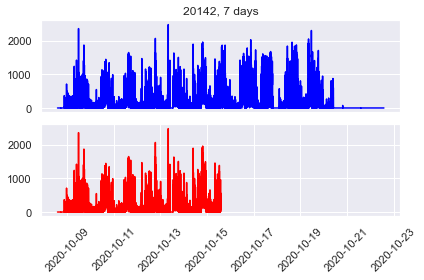

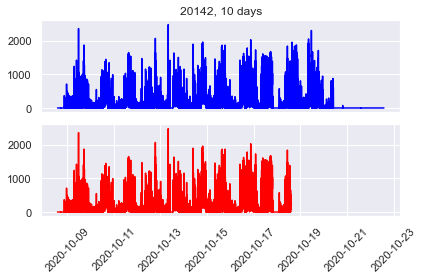

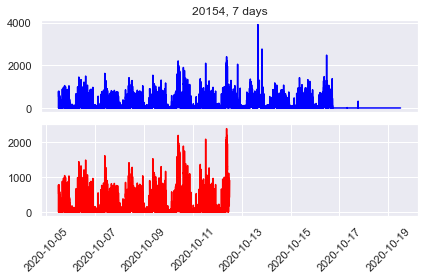

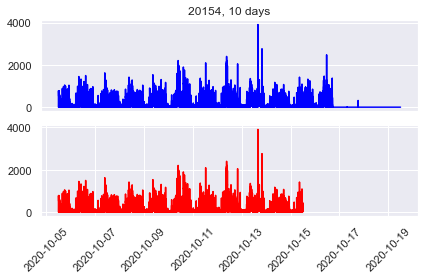

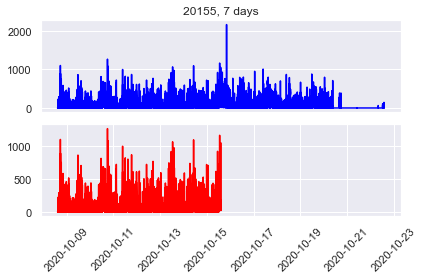

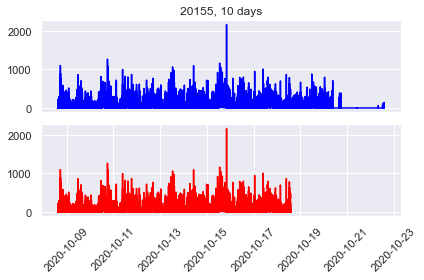

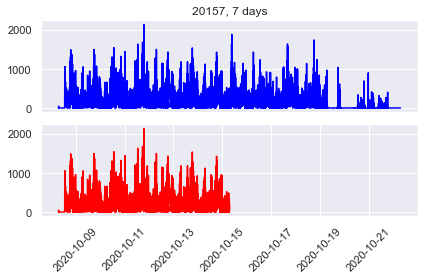

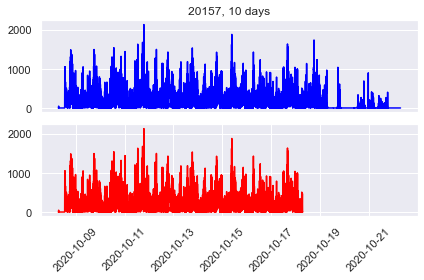

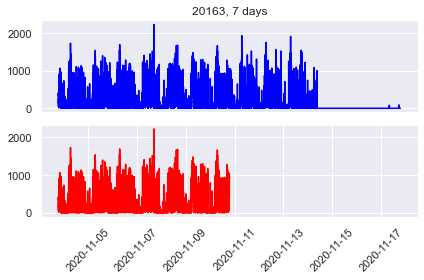

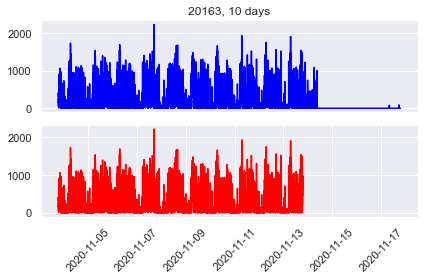

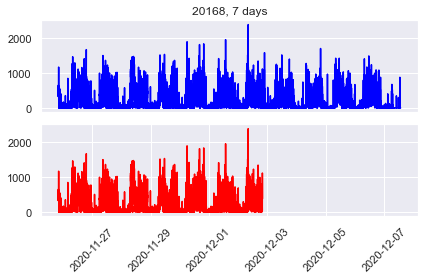

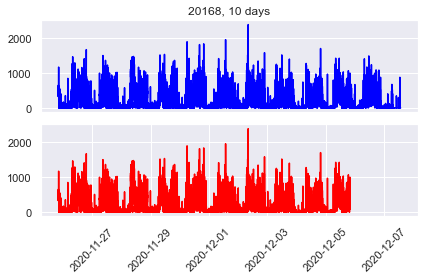

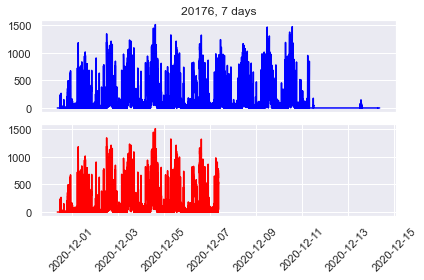

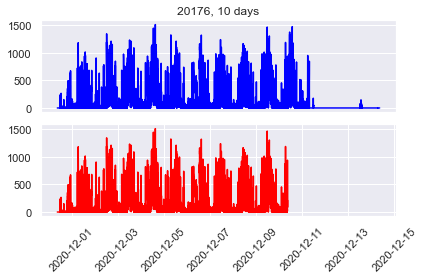

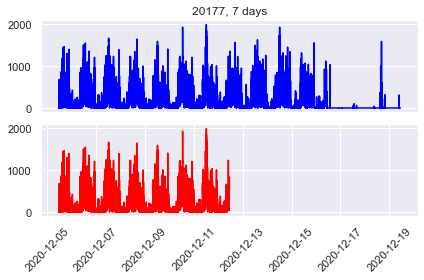

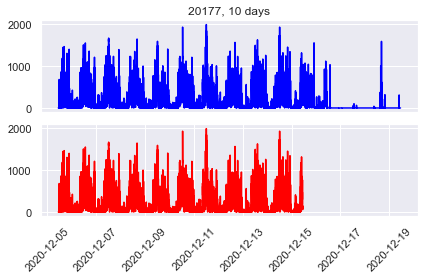

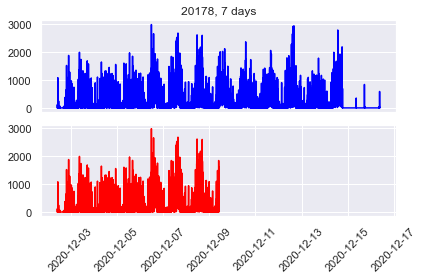

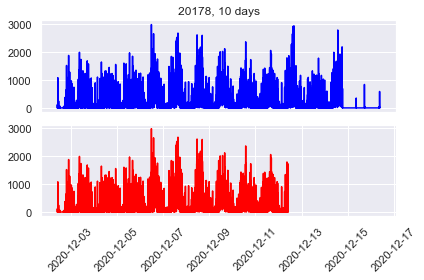

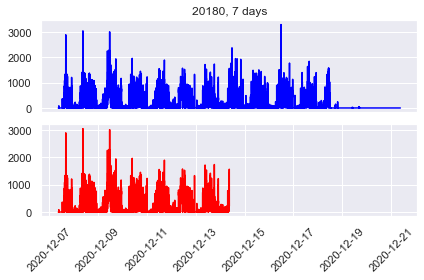

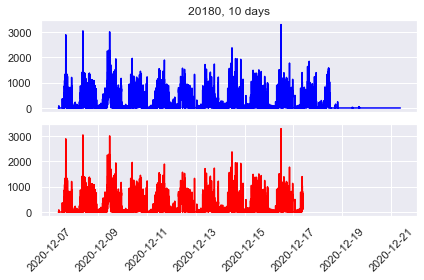

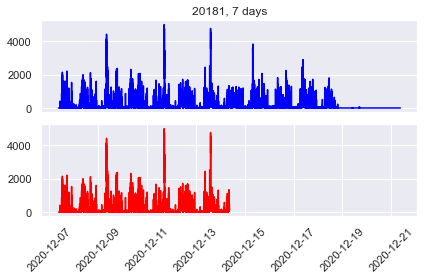

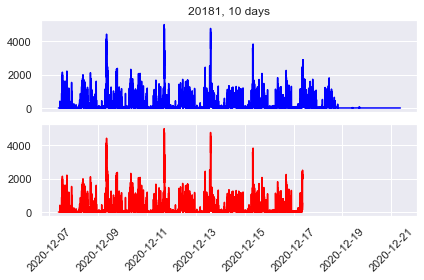

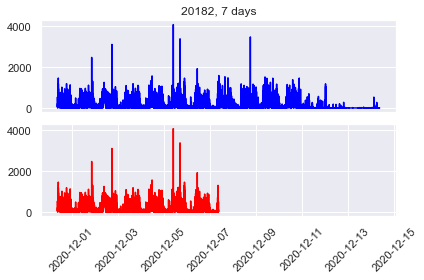

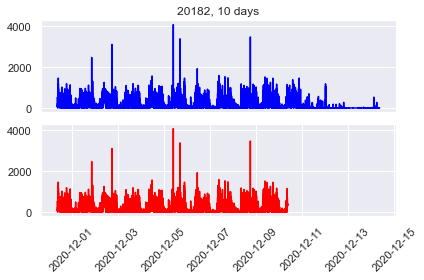

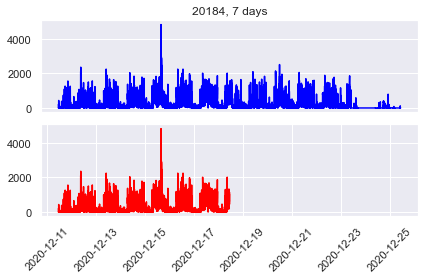

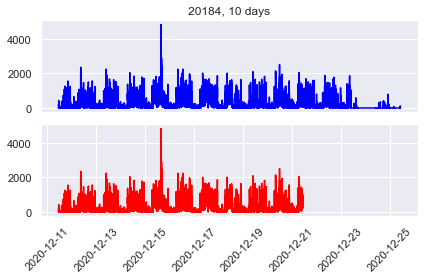

In [13]:
from wearables import preproc

out_dir = os.path.join(data_dir, 'actiwatch')

for in_file in act_files:
    
    record_id = str.split(in_file, "/")[-1][0:5]
    
    if record_id in act:
        record_id = record_id + '_repeat'

    act[record_id] = {}

    for ndays in recording_period_min:
        if in_file.endswith('.csv'):
            act[record_id][str(ndays)] = preproc.preproc(in_file, 'actiwatch', sr='1T', truncate=True, write=True, plot=True, recording_period_min=ndays, interpolate_limit=10, interpolate_method='linear')
            np.save(data_dir + '/actiwatch/act_cleaned_preproc.npy', act)

## Cosinor Analysis

Load saved npy files to save time.

In [15]:
act = np.load(data_dir + '/actiwatch/act_cleaned_preproc.npy', allow_pickle=True)[()]

In [16]:
act

{'10011': {'7': Time
  2019-10-24 16:30:00    143
  2019-10-24 16:31:00    283
  2019-10-24 16:32:00    229
  2019-10-24 16:33:00    191
  2019-10-24 16:34:00    252
                        ... 
  2019-10-31 16:26:00     29
  2019-10-31 16:27:00     43
  2019-10-31 16:28:00    463
  2019-10-31 16:29:00    165
  2019-10-31 16:30:00     56
  Freq: T, Name: Activity, Length: 10081, dtype: int64, '10': Time
  2019-10-24 16:30:00    143
  2019-10-24 16:31:00    283
  2019-10-24 16:32:00    229
  2019-10-24 16:33:00    191
  2019-10-24 16:34:00    252
                        ... 
  2019-11-03 16:26:00      0
  2019-11-03 16:27:00      0
  2019-11-03 16:28:00      0
  2019-11-03 16:29:00      0
  2019-11-03 16:30:00      0
  Freq: T, Name: Activity, Length: 14401, dtype: int64},
 '10011_repeat': {'7': Time
  2020-11-30 09:00:00    125.0
  2020-11-30 09:01:00     84.0
  2020-11-30 09:02:00    169.0
  2020-11-30 09:03:00    194.0
  2020-11-30 09:04:00    180.0
                         ...  
  2

In [18]:
cr_measures = ['actmin', 'amp', 'alpha', 'beta', 'phi']
cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in cr_measures]

In [19]:
str.split(act_files[2], "/")[-1]

'10012_10_18_2019_3_30_00_PM_Manual.csv'

In [20]:
from wearables import fitcosinor

cr_act = pd.DataFrame(index = list(act.keys()), columns = cols)
#index = [str.split(in_file, "/")[-1][0:5] for in_file in act_files]
for record_id in act.keys():
    print(record_id)
    for ndays in act[record_id].keys():
        try:
            cr_act.loc[record_id]["actmin_" + str(ndays) : "phi_" + str(ndays)] = fitcosinor.fitcosinor(act[record_id][str(ndays)], transform = 'antilogistic')[0].values[0]
        except Exception as e:
            print(e)

cr_act.to_csv(data_dir + '/actiwatch/cr_act_cleaned.csv')

10011


/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


10011_repeat
10012
10014
10016
10024
10025
10033
10035
10038
10040
10045
10045_repeat
10049
'Activity'
10062
10139
10140
10143
10144
10146
10147
10148
10149
'Activity'
10150
10152
20076
array must not contain infs or NaNs
20076_repeat
20103
20105
20105_repeat
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
20131
20142
20154
20155
20157
20163
20168
20176
20177
20178
20180
20181
20182
20184
wa_ac
'Activity'
'Activity'


## Visualize model fit

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from wearables import plotcosinor
import seaborn as sns
sns.set()

for record_id in act.keys():
    for ndays in act[record_id].keys():
        try:
            d1 = np.load('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/fit_preproc.npy', allow_pickle=True)[()][record_id][ndays]
            plotcosinor.plotcosinor(d1, 'antilogistic', 'Fitbit')
            plt.savefig(data_dir + 'circadian_measures/figures/' + record_id + '_' + ndays + 'd_fit_cr_plot.png', dpi = 300)
            plt.close('all')
        except Exception as e:
            print(e)
            
        try:
            d = np.load('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_preproc.npy', allow_pickle=True)[()][record_id][ndays]
            plotcosinor.plotcosinor(d, 'antilogistic', 'Actiwatch 2.0')
            plt.savefig(data_dir + 'circadian_measures/figures/' + record_id + '_' + ndays + 'd_act_cr_plot.png', dpi = 300)
            plt.close('all')
        except Exception as e:
            print(e)
            
        try:
            d2 = np.load('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/fit_clockfill.npy', allow_pickle=True)[()][record_id][ndays]
            plotcosinor.plotcosinor(d2, 'antilogistic', 'Fitbit')
            plt.savefig(data_dir + 'circadian_measures/figures/' + record_id + '_' + ndays + 'd_fit_clockfill_cr_plot.png', dpi = 300)
            plt.close('all')
        except Exception as e:
            print(e)


/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c -

array must not contain infs or NaNs


/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


array must not contain infs or NaNs
array must not contain infs or NaNs


/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


array must not contain infs or NaNs
'20076_repeat'


/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'20076_repeat'
'20076_repeat'


/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'20076_repeat'


/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c -

'Activity'
'Activity'
'Activity'
'Activity'
'20176'
'20176'
'20176'
'20176'


## RAR measure comparison

By:
* Device
* Condition (Actiwatch arm)
* Age group
* Sex?

In [56]:
df = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/WearableAssessment-Validation_DATA_2021-01-29_1236.csv')
df = df.ffill()
df = df[df['redcap_event_name'].str.contains("session_1_arm_1")]
df['subject'] = np.where(df['age_group'] == 1.0, 
                         '1' + df['record_id'].astype(str).str.pad(4,fillchar='0'), 
                         '2' + df['record_id'].astype(str).str.pad(4,fillchar='0'))
df.columns


Index(['record_id', 'redcap_event_name', 'age_group', 'selected_devices___1',
       'selected_devices___2', 'selected_devices___3', 'selected_devices___4',
       'handedness', 'gender', 'ethnicity___1', 'ethnicity___2',
       'ethnicity___3', 'ethnicity___4', 'ethnicity___5', 'ethnicity___6',
       'global_psqi', 'actiwatch_arm', 'bed_time', 'fall_asleep', 'wake_time',
       'hours_bed', 'hours_slept', 'tr_sleep_30', 'tr_wakeup',
       'tr_use_bathroom', 'tr_breathing', 'tr_snoring', 'tr_too_cold',
       'tr_too_hot', 'tr_dreams', 'tr_pain', 'other_sleep', 'other_explain',
       'sleep_medication', 'trouble_staying_awake', 'sleep_enthusiasm',
       'sleep_quality', 'component_one', 'fall_asleep_raw',
       'sleep_latency_raw', 'component_two', 'component_three',
       'sleep_efficiency', 'component_four', 'sleep_disruption_raw',
       'component_five', 'component_six', 'sleep_dysfunction_raw',
       'component_seven', 'subject'],
      dtype='object')

In [57]:
df = df[['subject', 'age_group', 'selected_devices___1', 'selected_devices___2', 'selected_devices___3', 'selected_devices___4', 'handedness', 'gender', 'actiwatch_arm']]
df = df.set_index('subject')
df = df.rename(columns={"selected_devices___1": "Actiwatch 2.0", "selected_devices___2": "Fitbit Charge 2 HR", \
                       "selected_devices___3": "Fitbit Inspire HR", "selected_devices___4": "Fitbit Inspire 2"})

conditions = [ df['Fitbit Charge 2 HR'] == 1.0, (df['Fitbit Inspire HR'] == 1.0), df['Fitbit Inspire 2'] == 1.0 ]
choices = [ 'Fitbit Charge 2 HR', 'Fitbit Inspire HR', 'Fitbit Inspire 2' ]
    
df['fitbit_device'] = np.select(conditions, choices, default="Fitbit Charge 2 HR")
df['age_group'] = df['age_group'].astype('int')

df = df.drop(['Actiwatch 2.0', 'Fitbit Charge 2 HR', 'Fitbit Inspire HR', 'Fitbit Inspire 2'], axis=1)

In [58]:
exclude = ['10023', '10076', '20182', '20184', '20176', '10151']
df = df[~df.index.isin(exclude)]
df

,age_group,handedness,gender,actiwatch_arm,fitbit_device
subject,,,,,
10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR
10012,1,1.0,2.0,1.0,Fitbit Charge 2 HR
10014,1,2.0,2.0,2.0,Fitbit Charge 2 HR
10016,1,2.0,2.0,1.0,Fitbit Charge 2 HR
10024,1,2.0,2.0,1.0,Fitbit Charge 2 HR
10025,1,2.0,1.0,1.0,Fitbit Charge 2 HR
10033,1,2.0,2.0,2.0,Fitbit Charge 2 HR
10035,1,2.0,2.0,1.0,Fitbit Charge 2 HR
10038,1,2.0,2.0,2.0,Fitbit Charge 2 HR


In [60]:
cr_act = pd.read_csv(data_dir + 'actiwatch/cr_act.csv', index_col='Unnamed: 0')
cr_act_cl = pd.read_csv(data_dir + 'actiwatch/cr_act_cleaned.csv', index_col='Unnamed: 0')
cr_act_cl.columns = cr_act_cl.columns.astype(str) + '_cl'
cr_fit = pd.read_csv(data_dir + 'fitbit/cr_fit.csv', index_col='Unnamed: 0')
#cr_fitFill = pd.read_csv(data_dir + 'fitbit/cr_fitFill.csv', index_col='Unnamed: 0')
#cr_fitFill.columns = cr_fitFill.columns.astype(str) + '_fitFill'

cr = cr_act.join(cr_fit, lsuffix='_act', rsuffix='_fit')
#cr = cr.join(cr_fitFill)
cr = cr.join(cr_act_cl)
cr = cr.rename_axis('subject')
df1 = df.join(cr)
df1

,age_group,handedness,gender,actiwatch_arm,fitbit_device,actmin_7_act,amp_7_act,alpha_7_act,beta_7_act,phi_7_act,...,actmin_7_cl,amp_7_cl,alpha_7_cl,beta_7_cl,phi_7_cl,actmin_10_cl,amp_10_cl,alpha_10_cl,beta_10_cl,phi_10_cl
subject,,,,,,,,,,,,,,,,,,,,,
10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.175642,1.639313,-0.731704,409.696423,14.860626,...,1.175642,1.639313,-0.731704,409.696424,14.860626,1.363729,1.548115,-0.746323,16.383066,14.705346
10012,1,1.0,2.0,1.0,Fitbit Charge 2 HR,1.234697,1.650103,-0.679612,18.606358,16.692487,...,1.234697,1.650103,-0.679612,18.606358,16.692487,1.595677,1.317037,-0.677184,20.531228,16.636261
10014,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.256328,1.578173,-0.693268,14.240344,16.530384,...,1.256328,1.578173,-0.693268,14.240345,16.530384,1.362734,1.521519,-0.739529,9.079725,16.542869
10016,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.625095,1.313470,-0.702661,46.254817,15.080706,...,1.625095,1.313470,-0.702661,46.254814,15.080706,1.935143,1.104650,-0.676155,16.282253,15.139309
10024,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.394889,1.534885,-0.840442,151.895305,15.278563,...,1.394889,1.534885,-0.840442,151.895309,15.278563,1.005708,2.000000,-0.926324,9.269544,15.318200
10025,1,2.0,1.0,1.0,Fitbit Charge 2 HR,1.232348,1.736845,-0.722795,14.288319,18.348131,...,1.232350,1.736841,-0.722796,14.288592,18.348139,1.024787,2.000000,-0.885230,8.333166,17.904136
10033,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.281244,1.506147,-0.445038,12.286829,14.551711,...,1.281244,1.506147,-0.445038,12.286829,14.551711,1.571068,1.298569,-0.521801,20.968515,14.906715
10035,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.055961,1.885233,-0.794379,161.280500,17.693718,...,1.055961,1.885233,-0.794379,161.280499,17.693718,1.274798,1.725013,-0.793318,176.253844,17.701790
10038,1,2.0,2.0,2.0,Fitbit Charge 2 HR,2.000000,0.863985,-0.677724,154.382768,16.045845,...,2.000000,0.863987,-0.677725,154.241915,16.045847,2.000000,0.950387,-0.680014,117.369904,16.049858


In [61]:
df1.columns

Index(['age_group', 'handedness', 'gender', 'actiwatch_arm', 'fitbit_device',
       'actmin_7_act', 'amp_7_act', 'alpha_7_act', 'beta_7_act', 'phi_7_act',
       'actmin_10_act', 'amp_10_act', 'alpha_10_act', 'beta_10_act',
       'phi_10_act', 'actmin_7_fit', 'amp_7_fit', 'alpha_7_fit', 'beta_7_fit',
       'phi_7_fit', 'actmin_10_fit', 'amp_10_fit', 'alpha_10_fit',
       'beta_10_fit', 'phi_10_fit', 'actmin_7_cl', 'amp_7_cl', 'alpha_7_cl',
       'beta_7_cl', 'phi_7_cl', 'actmin_10_cl', 'amp_10_cl', 'alpha_10_cl',
       'beta_10_cl', 'phi_10_cl'],
      dtype='object')

In [62]:
repeatSubs = [subject[0:5] for subject in cr.index[cr.index.str.contains('repeat')].to_list()]

In [63]:
beiweFiles = glob.glob(data_dir + 'fitbit/WA_*Narrow_beiwe*')
beiweSubs = [file.split('WA_')[1][0:5] for file in beiweFiles]

In [64]:
df1['beiwe'] = np.where((df1.index.isin(beiweSubs)) & (~df1.index.isin(repeatSubs)), 1, 0)
df1

,age_group,handedness,gender,actiwatch_arm,fitbit_device,actmin_7_act,amp_7_act,alpha_7_act,beta_7_act,phi_7_act,...,amp_7_cl,alpha_7_cl,beta_7_cl,phi_7_cl,actmin_10_cl,amp_10_cl,alpha_10_cl,beta_10_cl,phi_10_cl,beiwe
subject,,,,,,,,,,,,,,,,,,,,,
10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.175642,1.639313,-0.731704,409.696423,14.860626,...,1.639313,-0.731704,409.696424,14.860626,1.363729,1.548115,-0.746323,16.383066,14.705346,0
10012,1,1.0,2.0,1.0,Fitbit Charge 2 HR,1.234697,1.650103,-0.679612,18.606358,16.692487,...,1.650103,-0.679612,18.606358,16.692487,1.595677,1.317037,-0.677184,20.531228,16.636261,0
10014,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.256328,1.578173,-0.693268,14.240344,16.530384,...,1.578173,-0.693268,14.240345,16.530384,1.362734,1.521519,-0.739529,9.079725,16.542869,0
10016,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.625095,1.313470,-0.702661,46.254817,15.080706,...,1.313470,-0.702661,46.254814,15.080706,1.935143,1.104650,-0.676155,16.282253,15.139309,0
10024,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.394889,1.534885,-0.840442,151.895305,15.278563,...,1.534885,-0.840442,151.895309,15.278563,1.005708,2.000000,-0.926324,9.269544,15.318200,0
10025,1,2.0,1.0,1.0,Fitbit Charge 2 HR,1.232348,1.736845,-0.722795,14.288319,18.348131,...,1.736841,-0.722796,14.288592,18.348139,1.024787,2.000000,-0.885230,8.333166,17.904136,0
10033,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.281244,1.506147,-0.445038,12.286829,14.551711,...,1.506147,-0.445038,12.286829,14.551711,1.571068,1.298569,-0.521801,20.968515,14.906715,0
10035,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.055961,1.885233,-0.794379,161.280500,17.693718,...,1.885233,-0.794379,161.280499,17.693718,1.274798,1.725013,-0.793318,176.253844,17.701790,0
10038,1,2.0,2.0,2.0,Fitbit Charge 2 HR,2.000000,0.863985,-0.677724,154.382768,16.045845,...,0.863987,-0.677725,154.241915,16.045847,2.000000,0.950387,-0.680014,117.369904,16.049858,0


actiwatch arm: 1 right, 2 left
handedness: 1 left, 2 right

In [65]:
df1['actiwatch_assignment'] = np.where(df1['handedness'] - df1['actiwatch_arm'] == 0, 'dominant', 'non-dominant')

### Number of subjects & some basic descriptive statistics

In [66]:
# only looking at YA for now
df1 = df1[df1['age_group'] == 1]

In [67]:
df1

,age_group,handedness,gender,actiwatch_arm,fitbit_device,actmin_7_act,amp_7_act,alpha_7_act,beta_7_act,phi_7_act,...,alpha_7_cl,beta_7_cl,phi_7_cl,actmin_10_cl,amp_10_cl,alpha_10_cl,beta_10_cl,phi_10_cl,beiwe,actiwatch_assignment
subject,,,,,,,,,,,,,,,,,,,,,
10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.175642,1.639313,-0.731704,409.696423,14.860626,...,-0.731704,409.696424,14.860626,1.363729,1.548115,-0.746323,16.383066,14.705346,0,dominant
10012,1,1.0,2.0,1.0,Fitbit Charge 2 HR,1.234697,1.650103,-0.679612,18.606358,16.692487,...,-0.679612,18.606358,16.692487,1.595677,1.317037,-0.677184,20.531228,16.636261,0,dominant
10014,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.256328,1.578173,-0.693268,14.240344,16.530384,...,-0.693268,14.240345,16.530384,1.362734,1.521519,-0.739529,9.079725,16.542869,0,dominant
10016,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.625095,1.313470,-0.702661,46.254817,15.080706,...,-0.702661,46.254814,15.080706,1.935143,1.104650,-0.676155,16.282253,15.139309,0,non-dominant
10024,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.394889,1.534885,-0.840442,151.895305,15.278563,...,-0.840442,151.895309,15.278563,1.005708,2.000000,-0.926324,9.269544,15.318200,0,non-dominant
10025,1,2.0,1.0,1.0,Fitbit Charge 2 HR,1.232348,1.736845,-0.722795,14.288319,18.348131,...,-0.722796,14.288592,18.348139,1.024787,2.000000,-0.885230,8.333166,17.904136,0,non-dominant
10033,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.281244,1.506147,-0.445038,12.286829,14.551711,...,-0.445038,12.286829,14.551711,1.571068,1.298569,-0.521801,20.968515,14.906715,0,dominant
10035,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.055961,1.885233,-0.794379,161.280500,17.693718,...,-0.794379,161.280499,17.693718,1.274798,1.725013,-0.793318,176.253844,17.701790,0,non-dominant
10038,1,2.0,2.0,2.0,Fitbit Charge 2 HR,2.000000,0.863985,-0.677724,154.382768,16.045845,...,-0.677725,154.241915,16.045847,2.000000,0.950387,-0.680014,117.369904,16.049858,0,dominant


In [16]:
#df1.groupby('age_group').describe()

handedness                                              gender  \
               count      mean       std  min  25%  50%  75%  max  count   
age_group                                                                  
1               30.0  1.900000  0.305129  1.0  2.0  2.0  2.0  2.0   30.0   
2               26.0  1.961538  0.344182  1.0  2.0  2.0  2.0  3.0   26.0   

                     ... amp_difFill           phi_difFill            \
               mean  ...         75%       max       count      mean   
age_group            ...                                               
1          1.733333  ...    0.623423  1.303280        24.0 -0.263533   
2          1.538462  ...    0.427688  1.081218        22.0  0.586927   

                                                                       
                std       min       25%       50%       75%       max  
age_group                                                              
1          2.191730 -9.517374  0.007361  0.252569  0.505522  2.218530  
2          1.510165 -4.782693  0.192394  0.383107  1.001471  3.183414  

[2 rows x 304 columns]

In [68]:
df1.groupby('fitbit_device').describe()

age_group                                    handedness  \
                       count mean  std  min  25%  50%  75%  max      count   
fitbit_device                                                                
Fitbit Charge 2 HR      19.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       19.0   
Fitbit Inspire HR       11.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       11.0   

                              ...  phi_10_cl            beiwe            \
                        mean  ...        75%        max count      mean   
fitbit_device                 ...                                         
Fitbit Charge 2 HR  1.894737  ...  17.359895  17.904136  19.0  0.000000   
Fitbit Inspire HR   1.909091  ...  17.689705  17.851276  11.0  0.090909   

                                                       
                         std  min  25%  50%  75%  max  
fitbit_device                                          
Fitbit Charge 2 HR  0.000000  0.0  0.0  0.0  0.0  0.0  
Fitbit Inspire HR   0.301511  0.0  0.0  0.0  0.0  1.0  

[2 rows x 280 columns]

## Correlations

### Rest-activity 7 day measures

w/auto sleep/wake classification from Actiware

In [69]:
df1[df1.columns[df1.columns.str.contains('7_fit|7_act')].to_list()].corr()[df1.columns[df1.columns.str.contains('7_fit')].to_list()[0:5]][0:5]

,actmin_7_fit,amp_7_fit,alpha_7_fit,beta_7_fit,phi_7_fit
actmin_7_act,0.281821,0.274524,0.186322,0.470509,0.158056
amp_7_act,-0.285322,-0.250110,-0.266408,-0.536017,-0.160751
alpha_7_act,-0.097081,0.379084,0.009522,0.087971,-0.087668
beta_7_act,-0.078605,0.321874,-0.145221,0.013447,-0.117013
phi_7_act,0.205831,-0.250996,0.151281,0.129724,0.396309


w/ manual revision of sleep/wake classification 

In [77]:
df1[df1.columns[df1.columns.str.contains('7_fit|7_cl')].to_list()].corr()[df1.columns[df1.columns.str.contains('7_fit')].to_list()[0:5]][5:10]

,actmin_7_fit,amp_7_fit,alpha_7_fit,beta_7_fit,phi_7_fit
actmin_7_cl,0.356432,0.352753,0.217034,0.479992,0.155522
amp_7_cl,-0.461409,-0.179535,-0.336894,-0.609554,-0.158138
alpha_7_cl,0.178284,0.216320,0.175715,0.200246,-0.093932
beta_7_cl,0.037139,0.178048,-0.160403,0.088415,-0.159164
phi_7_cl,0.137529,0.005791,0.197313,0.149839,0.805381


### Rest-activity 10 day measures

w/auto sleep/wake classification from Actiware

In [39]:
df1[df1.columns[df1.columns.str.contains('10_fit|10_act')].to_list()].corr(method='spearman')[df1.columns[df1.columns.str.contains('10_fit')].to_list()[0:5]][0:5]

,actmin_10_fit,amp_10_fit,alpha_10_fit,beta_10_fit,phi_10_fit
actmin_10_act,-0.113636,-0.013834,0.149209,0.013834,-0.301383
amp_10_act,-0.015949,0.127590,-0.160485,-0.131079,0.411678
alpha_10_act,-0.171937,0.101779,0.253953,0.111660,-0.371542
beta_10_act,0.191700,0.049407,-0.249012,0.552372,-0.317194
phi_10_act,0.066206,-0.031621,0.129447,-0.116601,0.863636


w/ manual revision of rest/wake classification

In [79]:
df1[df1.columns[df1.columns.str.contains('10_fit|10_cl')].to_list()].corr()[df1.columns[df1.columns.str.contains('10_fit')].to_list()[0:5]][5:10]


,actmin_10_fit,amp_10_fit,alpha_10_fit,beta_10_fit,phi_10_fit
actmin_10_cl,-0.020731,0.079744,-0.001958,0.096921,-0.242182
amp_10_cl,-0.099549,0.134968,0.014858,-0.152671,0.328913
alpha_10_cl,-0.118632,0.180685,-0.029960,-0.170937,-0.395165
beta_10_cl,0.102825,0.175458,-0.145066,0.355716,0.009004
phi_10_cl,0.019210,-0.105054,0.149425,0.117517,0.860296


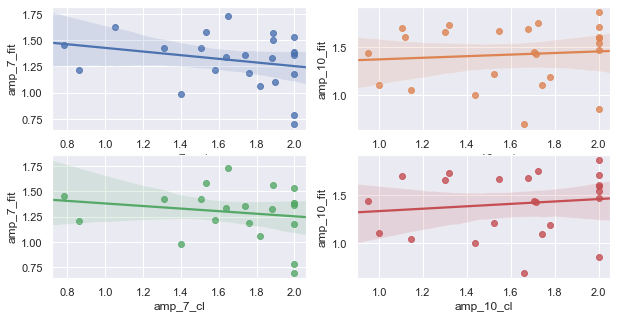

In [105]:
fig, ax = plt.subplots(2, 2, figsize = (10, 5))
sns.regplot(ax = ax[0,0], x = 'amp_7_act', y = 'amp_7_fit', ci=95, data = df1)
sns.regplot(ax = ax[0,1], x = 'amp_10_act', y = 'amp_10_fit', ci=95, data = df1)

sns.regplot(ax = ax[1,0], x = 'amp_7_cl', y = 'amp_7_fit', ci=95, data = df1)
sns.regplot(ax = ax[1,1], x = 'amp_10_cl', y = 'amp_10_fit', ci=95, data = df1)


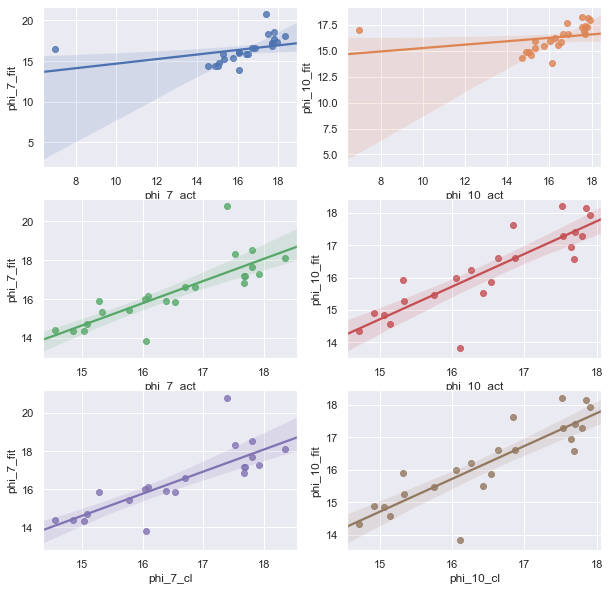

In [109]:
fig, ax = plt.subplots(3, 2, figsize = (10, 10))

sns.regplot(ax = ax[0,0], x = 'phi_7_act', y = 'phi_7_fit', ci=95, data = df1)
sns.regplot(ax = ax[0,1], x = 'phi_10_act', y = 'phi_10_fit', ci=95, data = df1)

sns.regplot(ax = ax[1,0], x = 'phi_7_act', y = 'phi_7_fit', ci=95, data = df1[df1['phi_7_act'] > 10])
sns.regplot(ax = ax[1,1], x = 'phi_10_act', y = 'phi_10_fit', ci=95, data = df1[df1['phi_7_act'] > 10])

sns.regplot(ax = ax[2,0], x = 'phi_7_cl', y = 'phi_7_fit', ci=95, data = df1)
sns.regplot(ax = ax[2,1], x = 'phi_10_cl', y = 'phi_10_fit', ci=95, data = df1)


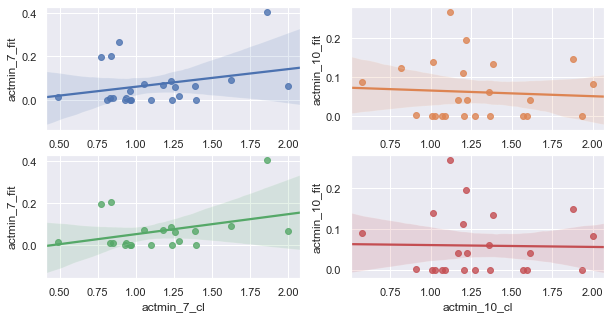

In [106]:
fig, ax = plt.subplots(2, 2, figsize = (10, 5))
sns.regplot(ax = ax[0,0], x = 'actmin_7_act', y = 'actmin_7_fit', ci=95, data = df1)
sns.regplot(ax = ax[0,1], x = 'actmin_10_act', y = 'actmin_10_fit', ci=95, data = df1)

sns.regplot(ax = ax[1,0], x = 'actmin_7_cl', y = 'actmin_7_fit', ci=95, data = df1)
sns.regplot(ax = ax[1,1], x = 'actmin_10_cl', y = 'actmin_10_fit', ci=95, data = df1)


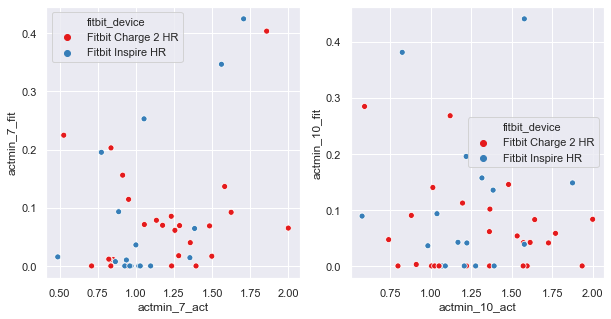

In [30]:
# fig, ax = plt.subplots(1, 2, figsize = (10, 5))
# sns.scatterplot(ax = ax[0], x = 'actmin_7_act', y = 'actmin_7_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')
# sns.scatterplot(ax = ax[1], x = 'actmin_10_act', y = 'actmin_10_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')


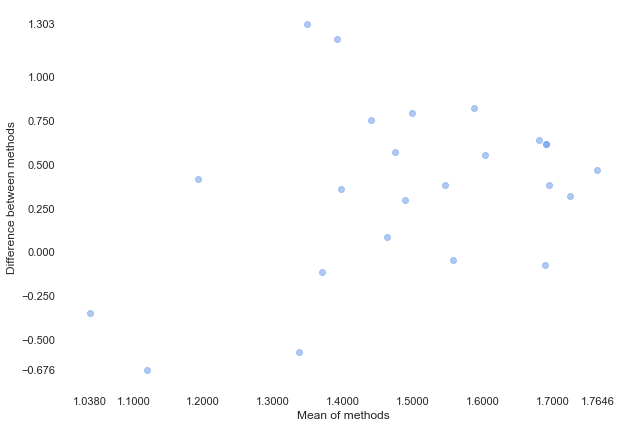

In [114]:
import pyCompare
pyCompare.blandAltman(df1['amp_7_act'].values, df1['amp_7_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

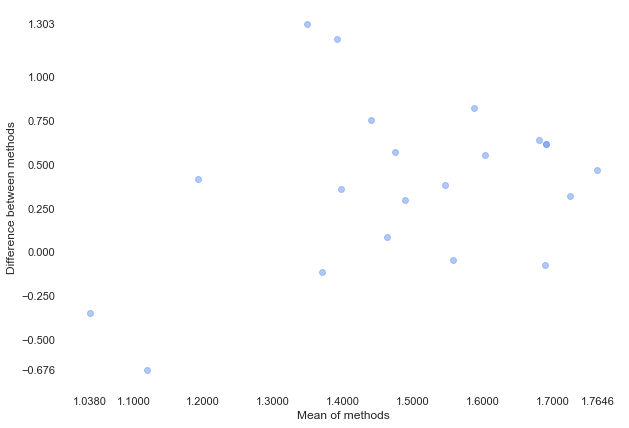

In [115]:
import pyCompare
pyCompare.blandAltman(df1['amp_7_cl'].values, df1['amp_7_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

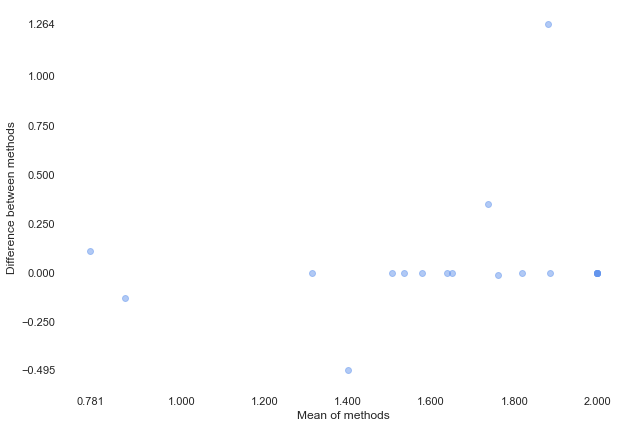

In [116]:
import pyCompare
pyCompare.blandAltman(df1['amp_7_act'].values, df1['amp_7_cl'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

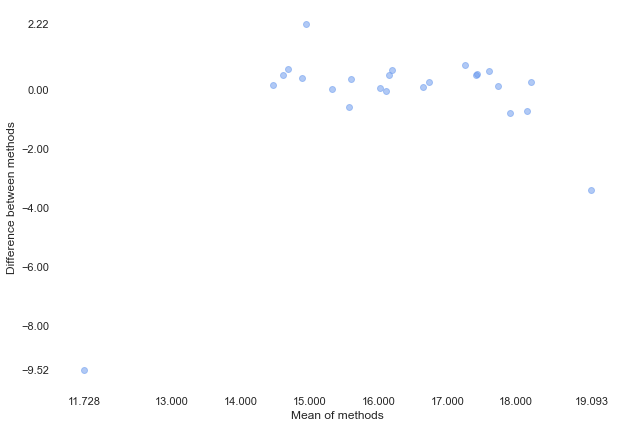

In [117]:
import pyCompare
pyCompare.blandAltman(df1['phi_7_act'].values, df1['phi_7_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

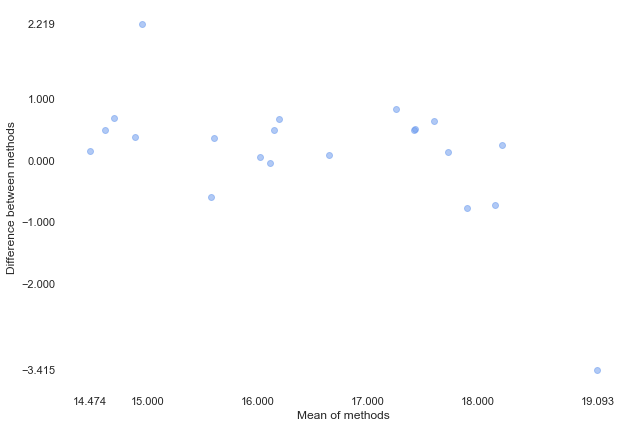

In [118]:
import pyCompare
pyCompare.blandAltman(df1['phi_7_cl'].values, df1['phi_7_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

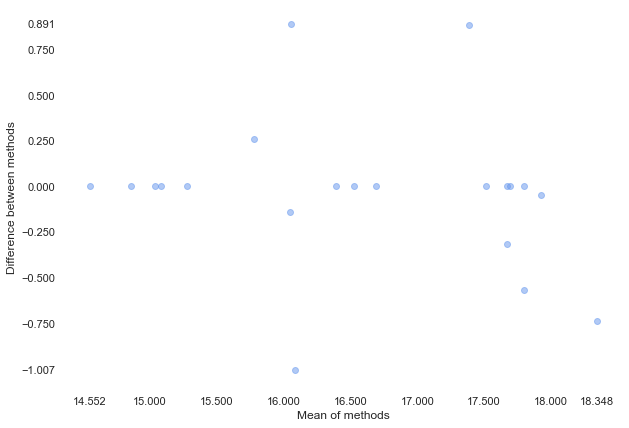

In [119]:
import pyCompare
pyCompare.blandAltman(df1['phi_7_act'].values, df1['phi_7_cl'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

In [121]:
df1.to_csv(data_dir + 'WA_analysis_main_df.csv')